# Bayesian A/B Testing: Connection to $p$-Values

GitHub: [https://github.com/andrewbrdk/Bayesian-AB-Testing](https://github.com/andrewbrdk/Bayesian-AB-Testing)

*The $p$-values from the $t$-test, $\chi^2$-test, and Mann-Whitney $U$ test in A/B experiments are numerically close to the Bayesian best group probabilities. This relation holds despite differences in the underlying definitions.*

*- [$P$-Values](#$P$-Values)*  
*- [$T$-Test](#$T$-Test)*  
*- [$\chi^2$-Test](#$\chi^2$-Test)*  
*- [Mann-Whitney $U$ Test](#Mann-Whitney-$U$-Test)*  
*- [References](#References)*

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.grid": True,
    "grid.color": "whitesmoke",
    "axes.axisbelow": True,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.titlesize": 14,
    "axes.titlepad": 20,
    "axes.titlelocation": "left",
    "lines.linewidth": 1.3,
    "legend.frameon": False,
    "figure.figsize": (10, 5),
    "figure.dpi": 200,
    "savefig.dpi": 200,
})
np.random.seed(7)

## $P$-Values

$P$-values are used in null hypothesis significance testing [[HT](https://en.wikipedia.org/wiki/Statistical_hypothesis_test)]. A null hypothesis $H_0$ is specified, and a statistical test $T$—a random variable with known distribution $P_T(x \mid H_0)$ under $H_0$—is selected. The observed value $x_0$ is the test statistic [[TestStat](https://en.wikipedia.org/wiki/Test_statistic)]. The one-sided $p$-value is defined as $p = P_T(x \ge x_0 \mid H_0)$ [[PVal](https://en.wikipedia.org/wiki/P-value), [TailedTests](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests)]. Small $p$-values lead to rejection of $H_0$; otherwise, it is retained.

<center>
<img src="https://github.com/andrewbrdk/Bayesian-AB-Testing/blob/main/figs/null_hypothesis.png?raw=true" alt="null_hypothesis" width="800"/>  
<br>
<em>Under the null hypothesis $H_0$ the test statistic follows the distribution $P_T(x \mid H_0)$, and the $p$-value is $p = P_T(x \ge x_0 \mid H_0)$. </em>
</center>

Decisions regarding the null hypothesis $H_0$ are based on the $p$-value, $p = P_T(x \ge x_0 \mid H_0)$, whereas the probability of the hypothesis given the observed data is expressed as $P(H_0 \mid x_0)$. According to Bayes’ theorem, $P(H_0 \mid x_0) \propto P_T(x = x_0 \mid H_0) P(H_0)$. In other words, selecting a hypothesis requires computing the likelihood of the observed data under competing hypotheses and comparing these values while accounting for prior probabilities.

$$
\begin{gather}
p = P_{T}(x \ge x_{0} | H_0)
\\
\,
\\
P(H_0 | x_0) = \frac{P_{T}(x = x_{0} | H_0) P(H_0)}{P_{T}(x = x_{0} | H_0) P(H_0) + P_{T}(x = x_{0} | {\sim}H_0) P({\sim}H_0)}
\end{gather}
$$

In A/B testing, the most commonly used methods are the $t$-test for means, the $\chi^2$-test for proportions, and the Mann-Whitney $U$ test. It is shown below that, under certain conditions, the $p$-values of these tests are numerically close to the Bayesian probabilities that the parameter of one group exceeds that of the other. These relationships hold despite differences in the underlying definitions of the tests.

## $T$-Test

Means are compared using $t$-tests [[TTest](https://en.wikipedia.org/wiki/Student%27s_t-test)]. Consider two samples of sizes $N_A$ and $N_B$ drawn from random variables $A$ and $B$. Under the null hypothesis of equal population means, $H_0: E[A] = E[B]$, the ratio of the difference in sample means to its standard error, $X = \overline{\Delta} / s_{\Delta}$, is expected to follow a $t$-distribution [[WelchT](https://en.wikipedia.org/wiki/Welch%27s_t-test)]. For sufficiently large sample sizes, this distribution approaches the standard normal, $\text{Norm}(0,1)$ [[TDist](https://en.wikipedia.org/wiki/Student%27s_t-distribution)]. From the observed data, the test statistic is $x_0 = \overline{\Delta} / s_{\Delta}$, and the probability of obtaining a value equal to or greater than $x_0$ defines the one-sided $p$-value, $P_X(x \ge x_0 \mid H_0)$. If this $p$-value is below the chosen significance level, the means of the two groups are considered significantly different.

$$
\begin{gather}
\overline{A} = \frac{1}{N_{A}} \sum_{i=1}^{N_{A}} A_i,
\quad
s_A^2 = \frac{1}{N_A} \sum_{i=1}^{N_A} (A_i - \overline{A})^2,
\quad
\text{similar for } B
\\
X = \frac{\overline{\Delta}}{s_{\Delta}},
\quad
\overline{\Delta} = \overline{B} - \overline{A},
\quad
s^2_{\Delta} = \frac{s_A^2}{N_A} + \frac{s_B^2}{N_B}
\\
H_0: E[A] = E[B],
\quad
P_{X}(x | H_0) \approx \text{Norm}(x; 0, 1)
\\
x_0 - \text{realized value of } X, \quad
p = P_{X}(x \ge x_0 | H_0)
\end{gather}
$$

The A/B testing goal is to select the group with the higher mean. Instead of the $p$-value $P_X(x \ge x_0 \mid H_0)$, the quantity of interest is the probability that the mean of group $B$ exceeds that of group $A$ given the observed data $P(\mu_B > \mu_A \mid A_i, B_j) = P(\mu_\Delta > 0 \mid A_i, B_j)$, where $\mu_A$, $\mu_B$, and $\mu_\Delta$ denote the true means of the corresponding distributions. This probability can be estimated using Bayesian modeling by constructing a posterior distribution for the mean difference $\mu_\Delta$. By the central limit theorem, the distribution of sample means is approximately normal. Therefore, the likelihood is chosen as a normal distribution, $P(\overline{\Delta} \mid \mu_\Delta) = \text{Norm}(\overline{\Delta} \mid \mu_\Delta, s_\Delta^2)$, where $s_\Delta^2$ is the variance estimated from the data. The model contains a single random parameter, the mean difference $\mu_\Delta$. Modeling is applied to the sample means rather than the raw observations. Thus, parameter updates are based on a single observed value, $\overline{\Delta}$. For conjugacy, the prior distribution is also chosen to be normal, $P(\mu_\Delta) = \text{Norm}(\mu_\Delta \mid \mu_0, \sigma_0^2)$. The posterior distribution is then normal with updated mean and variance, $P(\mu_\Delta \mid \overline{\Delta}) = \text{Norm}(\mu_\Delta \mid \mu_N, \sigma_N^2)$ [[ConjPrior](https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution)]. For a sufficiently broad prior centered at zero, $\mu_0 = 0$ and $\sigma_0^2 \gg s_\Delta^2$, the posterior distribution approximately $P(\mu_\Delta \mid \overline{\Delta}) \approx \text{Norm}(\mu_\Delta \mid \overline{\Delta}, s_\Delta^2)$. The probability that the mean of one group exceeds the other can then be expressed as the upper tail of a normal distribution with mean $x_0 = \overline{\Delta}/s_\Delta$ and unit variance: $P(\mu_B > \mu_A \mid A_i, B_j) = P(\mu_\Delta > 0 \mid \overline{\Delta}) \approx P(\text{Norm}(x > 0 \mid x_0, 1))$.

$$
\begin{split}
P(\overline{\Delta} | \mu_{\Delta}) & =
\text{Norm}(\overline{\Delta} | \mu_{\Delta}, s_{\Delta}^2),
\quad
P(\mu_{\Delta}) =
\text{Norm}(\mu_{\Delta} | \mu_0, \sigma_0^2) 
\\
P(\mu_{\Delta} | \overline{\Delta}) 
& = \text{Norm}(\mu_{\Delta} | \mu_{N}, \sigma_{N}^2),
\quad
\sigma_{N}^2 = \frac{\sigma_{0}^2 s_{\Delta}^2}{s_{\Delta}^2 + \sigma_{0}^2},
\quad
\mu_{N} = \mu_{0} \frac{\sigma_{N}^2}{\sigma_{0}^2} + \frac{\sigma_{N}^2}{s_{\Delta}^2} \overline{\Delta}
\\
\mu_0 = 0, & \, \sigma_{0}^2 \gg s^2_{\Delta}: 
\, 
\sigma_N^2 \approx s^2_{\Delta}, \, \mu_N \approx \overline{\Delta}, 
\\
P(\mu_{\Delta} | \overline{\Delta}) & \approx 
\text{Norm}(\mu_{\Delta} | \overline{\Delta}, s^2_{\Delta})
\\
P(\mu_B > \mu_A | A_i, B_j ) &= P(\mu_{\Delta} > 0 | \overline{\Delta})  \approx P(\text{Norm}(\mu_{\Delta} > 0 | \overline{\Delta}, s^2_{\Delta})) = P(\text{Norm}(x > 0 | x_0, 1))
\end{split}
$$

By the symmetry of the normal distribution, $P(\text{Norm}(x > x_0 \mid 0, 1)) = P(\text{Norm}(x < 0 \mid x_0, 1))$. Therefore, the one-sided $p$-value from a $t$-test is close to the probability that the mean of one group exceeds that of the other.

$$
\begin{split}
p = P_{X}(x > x_0 | H_0)
& = P \left( \text{Norm}(x > x_0| 0, 1) \right)
\\
& =  P \left( \text{Norm}(x < 0 | x_0, 1) \right)
\\
& = 1 - P \left( \text{Norm}(x > 0 | x_0, 1) \right)
\approx 1 - P(\mu_B > \mu_A | A_i, B_j )
\end{split}
$$

To illustrate, consider two normal distributions with different means. For a given sample, the Bayesian estimate of the probability $P(\mu_B > \mu_A \mid A_i, B_j)$ is compared with the $p$-value from a $t$-test. A one-sided $t$-test with unequal variances (`equal_var=False`, `alternative`) is used [[ScipyTTestInd](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html)]. The probability $p = P(x > x_0 \mid H_0) = P(\text{Norm}(x > x_0 \mid 0, 1))$ is shaded dark, while $P(\text{Norm}(x < 0 \mid x_0, 1)) \approx 1 - P(\mu_B > \mu_A \mid A_i, B_j)$ is shaded light. By the properties of the normal distribution, the areas of these regions are equal. Consequently, the $p$-value is numerically close to the Bayesian estimate of the probability. It should be noted, however, that the two are not equivalent—they are defined differently.

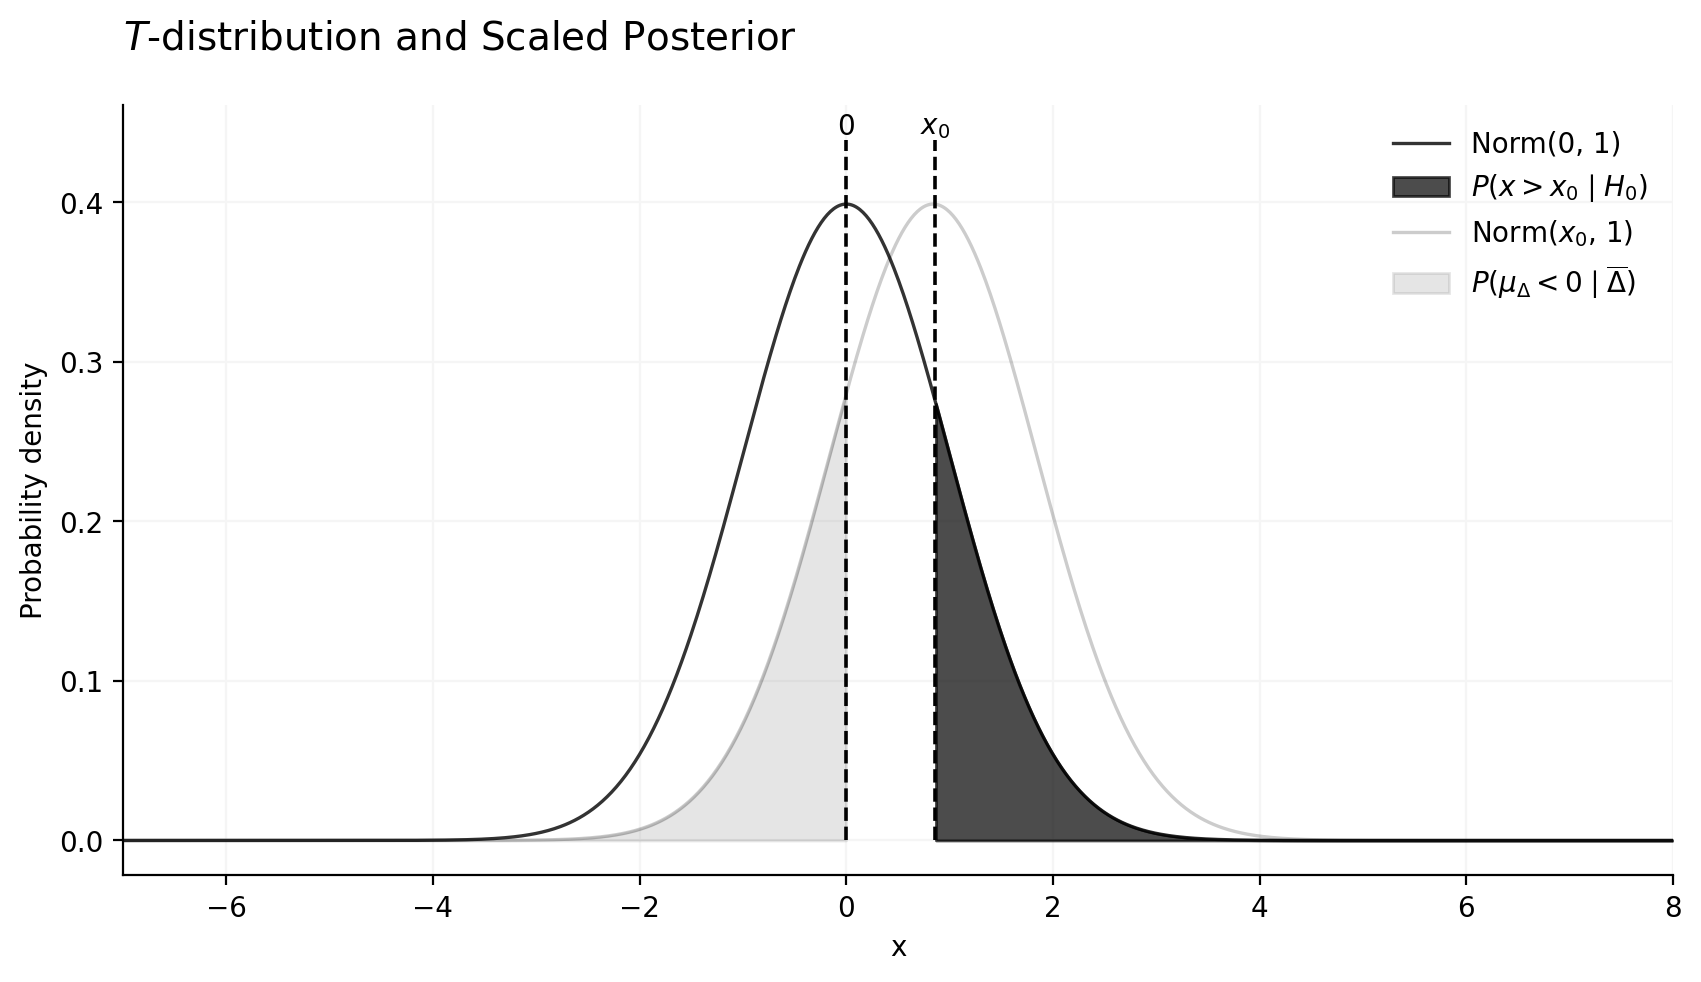

p-value P(x>x0 | H0): 0.1962
1 - p: 0.8038
Bayes P(mu_delta > 0): 0.7999


In [6]:
def posterior_diff_scaled(sampA, sampB, mu0=None, s20=None):
    delta = sampB.mean() - sampA.mean()
    s2delta = sampA.var() / sampA.size + sampB.var() / sampB.size
    mu0 = mu0 or 0
    s20 = s20 or 30 * s2delta
    s2n = s2delta * s20 / (s2delta + s20)
    mun = mu0 * s2n / s20 + delta * s2n / s2delta
    return stats.norm(loc=mun/np.sqrt(s2n), scale=1)

muA = 0.1
muB = 0.115
sigma = 1.3

exactA = stats.norm(muA, sigma)
exactB = stats.norm(muB, sigma)

N = 30000
sampA = exactA.rvs(size=N)
sampB = exactB.rvs(size=N)

a = 'greater' if np.mean(sampA) > np.mean(sampB) else 'less'
t_stat, p_value = stats.ttest_ind(sampA, sampB, equal_var=False, alternative=a)
t_stat = np.abs(t_stat)

post_dist = posterior_diff_scaled(sampA, sampB)
mean_b_gt_a = 1 - post_dist.cdf(0)

xaxis_min = -7
xaxis_max = 8
x = np.linspace(xaxis_min, xaxis_max, 1000)

plt.figure()
y0 = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y0, color="black", linewidth=1.2, alpha=0.8, label="Norm(0, 1)")
plt.fill_between(x[x > t_stat], y0[x > t_stat], color="black", alpha=0.7, label=r"$P(x > x_0 \mid H_0)$")
y_post = post_dist.pdf(x)
plt.plot(x, y_post, color="black", linewidth=1.2, alpha=0.2, label="Norm($x_0$, 1)")
plt.fill_between(x[x < 0], y_post[x < 0], color="gray", alpha=0.2, label=r"$P(\mu_\Delta < 0 \mid \overline{\Delta})$")
plt.plot([0, 0], [0, y0.max()*1.1], color="black", linestyle="--")
plt.text(0, y0.max()*1.1, "0", ha="center", va="bottom")
plt.plot([t_stat, t_stat], [0, y0.max()*1.1], color="black", linestyle="--")
plt.text(t_stat, y0.max()*1.1, r"$x_0$", ha="center", va="bottom")
plt.title(r"$T$-distribution and Scaled Posterior")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.xlim(xaxis_min, xaxis_max)
plt.legend()
plt.show()

print(f'p-value P(x>x0 | H0): {p_value:.4f}')
print(f'1 - p: {1 - p_value:.4f}')
print(f'Bayes P(mu_delta > 0): {mean_b_gt_a:.4f}')

The numerical closeness between the $p$-value and the Bayesian probability $P(\mu_\Delta > 0 \mid \overline{\Delta})$ can be assessed by the number of correctly identified superior groups across a series of experiments. In each experiment, two normal distributions are defined. For group $A$, the mean is fixed at `mu = 0.1`, while for group $B$, the mean is randomly chosen within $\pm 5\%$ of `mu`. Data points are added to each group in increments of `n_samp_step`. At each step, a $t$-test is performed. The experiment stops either when $1 - p$ reaches `prob_stop = 0.95` or when the maximum number of points `n_samp_max` has been used. The experiment duration is not fixed in advance, and the minimum sample size is `n_samp_min + n_samp_step`. Upon stopping, the Bayesian posterior distribution is computed, and the probability $P(\mu_\Delta > 0 \mid \overline{\Delta})$ is compared with the $p$-value. This procedure is repeated `nexps` times. The proportion of correctly identified superior groups across all experiments is recorded. Out of `nexps = 1000` experiments, 880 were completed, with 818 correctly identified cases, yielding an accuracy of `0.93`, which is close to `prob_stop = 0.95`. In each experiment, the $p$-values are close to the Bayesian probabilities. If the minimum sample size `n_samp_min` is too small, the proportion of correctly identified groups falls below `prob_stop`. For the Bayesian model, instead of specifying a minimum sample size, a smaller prior variance $\sigma_0^2$ can be used—the effect is similar to setting a minimum number of data points.

In [ ]:
cmp = pd.DataFrame(columns=['A', 'B', 'best_exact', 'exp_samp_size', 'A_exp', 'B_exp', 'best_exp', 'p_best_bayes', '1-pval'])

mu = 0.1
nexps = 1000
cmp['A'] = [mu] * nexps
cmp['B'] = mu * (1 + stats.uniform.rvs(loc=-0.05, scale=0.1, size=nexps))
cmp['best_exact'] = cmp.apply(lambda r: 'B' if r['B'] > r['A'] else 'A', axis=1)

n_samp_max = 3_000_000
n_samp_step = 10_000
n_samp_min = 100_000
prob_stop = 0.95

for i in range(nexps):
    muA = cmp.at[i, 'A']
    muB = cmp.at[i, 'B']
    exact_dist_A = stats.norm(loc=muA, scale=1)
    exact_dist_B = stats.norm(loc=muB, scale=1)
    n_samp_current = n_samp_min
    sampA = exact_dist_A.rvs(n_samp_max)
    sampB = exact_dist_B.rvs(n_samp_max)
    post_dist = None
    mean_b_gt_a_bayes = np.nan
    while n_samp_current < n_samp_max:
        n_samp_current += n_samp_step
        a = 'greater' if np.mean(sampA[:n_samp_current]) > np.mean(sampB[:n_samp_current]) else 'less'
        t_stat, p_value = stats.ttest_ind(sampA[:n_samp_current], sampB[:n_samp_current], equal_var=False, alternative=a)
        p_best_t = 1 - p_value
        best_gr = 'A' if p_best_t >= prob_stop and a == 'greater' else 'B' if p_best_t >= prob_stop and a == 'less' else None
        if best_gr:
            post_dist = posterior_diff_scaled(sampA[:n_samp_current], sampB[:n_samp_current])
            mean_b_gt_a_bayes = 1 - post_dist.cdf(0)
            cmp.at[i, 'A_exp'] = sampA[:n_samp_current].mean()
            cmp.at[i, 'B_exp'] = sampB[:n_samp_current].mean()
            cmp.at[i, 'exp_samp_size'] = n_samp_current
            cmp.at[i, 'best_exp'] = best_gr
            cmp.at[i, 'p_best_bayes'] = max(mean_b_gt_a_bayes, 1 - mean_b_gt_a_bayes)
            cmp.at[i, '1-pval'] = 1 - p_value
            break
    print(f'done {i}: nsamp {n_samp_current}, best_gr {best_gr}, Bayes P(b>a) {mean_b_gt_a_bayes:.4f}, T-test p-val {p_value:.4f}')

cmp['correct'] = cmp['best_exact'] == cmp['best_exp']
display(cmp.head(30))
finished = np.sum(cmp['best_exp'].notna())
cor_guess = np.sum(cmp['correct'])
print(f"Nexp: {nexps}, Finished: {finished}, Correct Guesses: {cor_guess}, Accuracy: {cor_guess / finished}")

## $\chi^2$-Test 

Conversion rates are commonly compared using the $\chi^2$ test [[Chi2Test](https://en.wikipedia.org/wiki/Chi-squared_test)]. Pearson’s $\chi^2$ statistic for multinomial distributions is defined as $\chi^2 = \sum_{i=1}^k (S_i - N p_i)^2 / N p_i$, where $N$ is the total number of observations, and $S_i$ and $N p_i$ are the observed and expected counts in category $i$ with proportion $p_i$ [[Chi2Pearson](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)]. For a binomial distribution, the statistic reduces to $\chi^2 = (S - N p)^2 / N p (1 - p)$. By the central limit theorem, $(S - N p) / \sqrt{N p (1 - p)}$ converges to a standard normal distribution. The sum of squares of $k$ independent standard normal variables defines the $\chi^2$-distribution with $k$ degrees of freedom, $\chi_k^2 = \sum_{i=1}^k X_i^2$, where $X_i \sim \text{Norm}(0,1)$ [[Chi2Dist](https://en.wikipedia.org/wiki/Chi-squared_distribution)]. The $\chi^2$ statistic converges to a $\chi_1^2$ distribution.

$$
\begin{split}
\chi^2 & = 
\sum_{i=1}^k \frac{(S_i - Np_i)^2}{N p_i}
\\
& =
\frac{(S - N p)^2}{N p}
+
\frac{((N - S) - N (1-p))^2}{N (1-p)}
\\
& =
\frac{(S - Np)^2}{N p (1-p)} 
\to \chi_1^2, \quad N \to \infty
\\
\chi^2_k & = \sum_{i=1}^{k} X_i^2,\, X_i \sim \text{Norm}(0,1)
\end{split}
$$

For a two groups conversion A/B test under the null hypothesis of equal expected conversion rates $p = (S_A + S_B)/(N_A + N_B)$ the test statistic is $\chi^2 = \Delta p^2 / s_\Delta^2$, where $\Delta p = S_B / N_B - S_A / N_A$ and $s_\Delta^2 = p(1 - p)(1/N_A + 1/N_B)$. The distribution of $\chi^2$ approaches a $\chi_1^2$ distribution for sufficiently large sample sizes. Since the $\chi_1^2$ distribution is obtained by squaring a standard normal variable, the $p$-value region $p = P_{\chi_1^2}(x > \chi^2 \mid H_0)$ corresponds to the region $P(\text{Norm}(x > \chi \cup x < -\chi \mid 0, 1))$. The areas of the regions $x > \chi$ and $x < -\chi$ are equal by symmetry of the normal distribution.

$$
\begin{gather}
A \sim \mathrm{Bernoulli}(p_A), 
\,
S_A = \sum_{i=1}^{N_A} A_i,
\quad
B \sim \mathrm{Bernoulli}(p_B), 
\,
S_B = \sum_{i=1}^{N_B} B_i,
\\
p = \frac{S_A + S_B}{N_A + N_B},
\quad
\Delta p = \frac{S_B}{N_B} - \frac{S_A}{N_A},
\quad
s_{\Delta}^2 = \frac{p(1-p)}{N_A} + \frac{p(1-p)}{N_B}
\\
\begin{split}
H_0: E[A] = E[B], \quad \chi^2 & = \frac{(S_A - N_A p)^2}{N_A p (1-p)} + \frac{(S_B - N_B p)^2}{N_B p (1-p)} 
\\
& = \frac{N_A N_B \Delta p^2}{(N_A + N_B) p (1-p)}
\\
& = \frac{\Delta p^2}{s_{\Delta}^2} \to \chi_1^2, \, n \to \infty
\end{split}
\\
\,
\\
\begin{split}
\text{p-val} & = P_{\chi_1^2}(x > \chi^2 | H_0)
\\
& = P \left( \text{Norm}(x > \chi \cup x < -\chi; 0, 1) \right) 
\\
& = 2 P\left( \text{Norm}(x > \chi; 0, 1) \right)
\end{split}
\end{gather}
$$

For the Bayesian estimation of the probability that the conversion rate of one group exceeds that of the other, $P(\theta_B > \theta_A \mid A_i, B_j)$, the likelihood in each group is modeled by a binomial distribution, $P(S \mid \theta, N) = \text{Binom}(S \mid \theta, N)$, and the prior by a beta distribution, $P(\theta) = \text{Beta}(\theta; \alpha, \beta)$. The posterior distribution is then also beta-distributed, with updated parameters $P(\theta \mid S, N) = \text{Beta}(\theta; \alpha + S, \beta + N - S)$. For typical values of $N$ and $S$, the beta distribution is well approximated by a normal distribution, and the distribution of the difference in conversion rates is therefore also approximately normal. Under uniform priors and small differences between groups, the distribution of the difference can be written as $P_{\Delta \theta}(x) \approx \text{Norm}(x; \Delta p, s_\Delta^2)$, with parameters $\Delta p$ and $s_\Delta^2$ identical to those used in the $\chi^2$ test. The probability that the conversion rate of one group exceeds that of the other is given by the positive tail of this distribution, $P(\theta_B > \theta_A \mid A_i, B_j) = P(\Delta \theta > 0 \mid A_i, B_j) \approx P(\text{Norm}(x > 0; \chi, 1))$.

$$
\begin{split}
P(S | \theta, N) & = \mbox{Binom}(S | \theta, N)
\\ 
P(\theta) & = \mbox{Beta}(\theta; \alpha, \beta)
\\
P(\theta | S, N) & = \mbox{Beta}(\theta; \alpha + S, \beta + N - S)
\\
& \approx \mbox{Norm}(\theta; \mu, \sigma^2),
\quad
\mu = S / N, 
\quad
\sigma^2 = \mu (1 - \mu) / N,
\quad 
S, N \gg \alpha, \beta \gg 1
\end{split}
$$

$$
\begin{split}
P_{\theta_A}(x) & = \mbox{Beta}(x; \alpha_A + S_A, \beta_A + N_A - S_A)
\approx \mbox{Norm}(x; \mu_A, \sigma^2_A),
\\
P_{\theta_B}(x) & = \mbox{Beta}(x; \alpha_B + S_B, \beta_B + N_B - S_B)
\approx \mbox{Norm}(x; \mu_B, \sigma^2_B)
\\
P_{\Delta \theta}(x) & \approx \mbox{Norm}\left(x; \mu_B - \mu_A, \sigma_A^2 + \sigma_B^2\right)
\approx \mbox{Norm}\left(x; \Delta p, s_{\Delta}^2 \right),
\quad \text{при } p \approx S_A/N_A \approx S_B/N_B
\end{split}
$$


$$
P(\theta_B > \theta_A | A_i, B_j) 
= P(\Delta \theta > 0 | A_i, B_j) 
\approx P\left(\text{Norm}(x > 0; \Delta p, s_{\Delta}^2) \right)
= P\left(\text{Norm}(x > 0; \chi, 1) \right), \quad \chi = \Delta p / s_{\Delta}
$$

By symmetry of the normal distribution $P(\text{Norm}(x > \chi \mid 0, 1)) = P(\text{Norm}(x < 0 \mid \chi, 1))$. Therefore, $P(\theta_B > \theta_A \mid A_i, B_j) \approx 1 - \text{p-val}/2$.

$$
\begin{gather}
\begin{split}
\text{p-val} & = P_{\chi_1^2}(x > \chi^2 | H_0)
\\
& = 2 P\left( \text{Norm}(x > \chi; 0, 1) \right)
\\
& = 2 P\left(\text{Norm}(x < 0; \chi, 1) \right)
\\
& \approx 2 \left( 1 - P(\theta_B > \theta_A | A_i, B_j) \right)
\end{split}
\\
\,
\\
P(\theta_B > \theta_A | A_i, B_j) \approx 1 - \frac{\text{p-val}}{2}
\end{gather}
$$

The relationship $P(\theta_B > \theta_A \mid A_i, B_j) \approx 1 - \mbox{p-val}/2$ can be tested using samples from two Bernoulli distributions with conversion rates $p_A = 0.1$ and $p_B = 0.103$. For the $\chi^2$ test, the data are arranged in a contingency table with rows $S_A, N_A - S_A$ and $S_B, N_B - S_B$ [[ScipyChi2Con](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html)]. Because the $\chi^2$ $p$-value does not indicate the direction of the difference between $p_A$ and $p_B$, the sample means are compared as well. On the first figure, the $\chi_1^2$ distribution is shown, with the shaded area corresponding to the $p$-value, $\mbox{p-val} = P_{\chi_1^2}(x > \chi^2 \mid H_0)$. On the second figure, the dark shaded regions $x > \chi$ and $x < -\chi$ correspond to the $p$-value when considering the squared normal variable. The gray curve represents the normal distribution $\text{Norm}(\chi, 1)$, and its shaded area approximately equals $1 - P(\theta_B > \theta_A \mid A_i, B_j)$. By symmetry, the area of the shaded gray region coincides with each of the dark regions. This demonstrates that the $p$-value and the Bayesian probability estimate are numerically consistent.

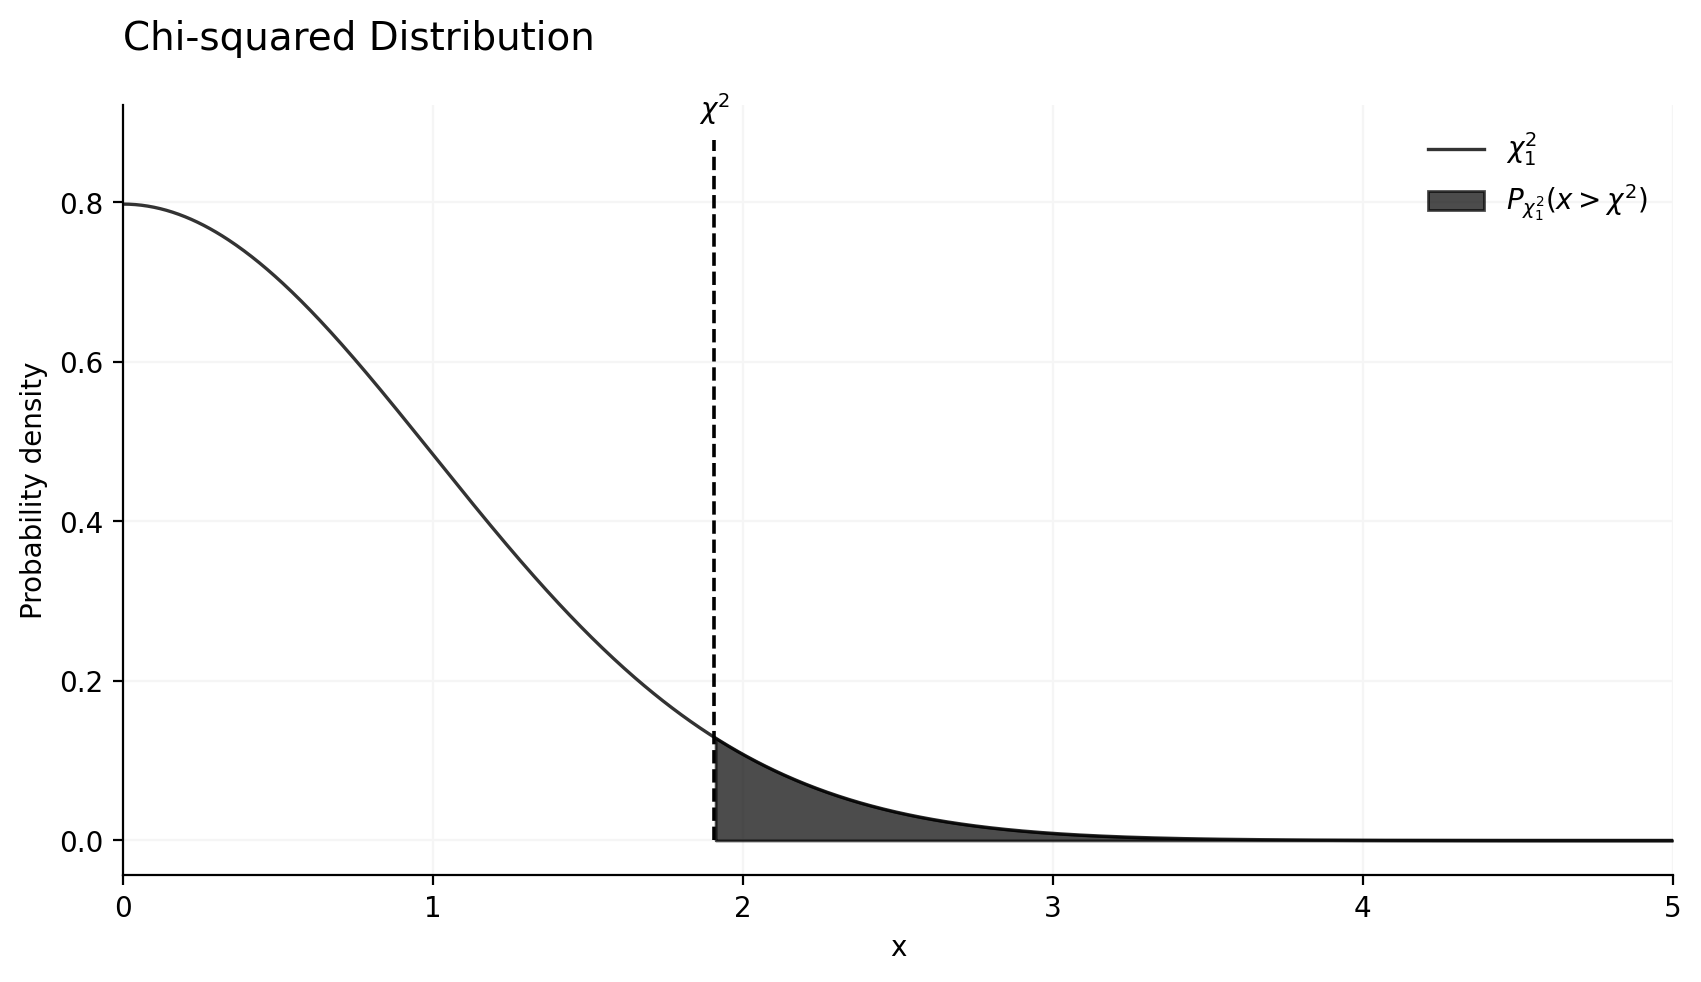

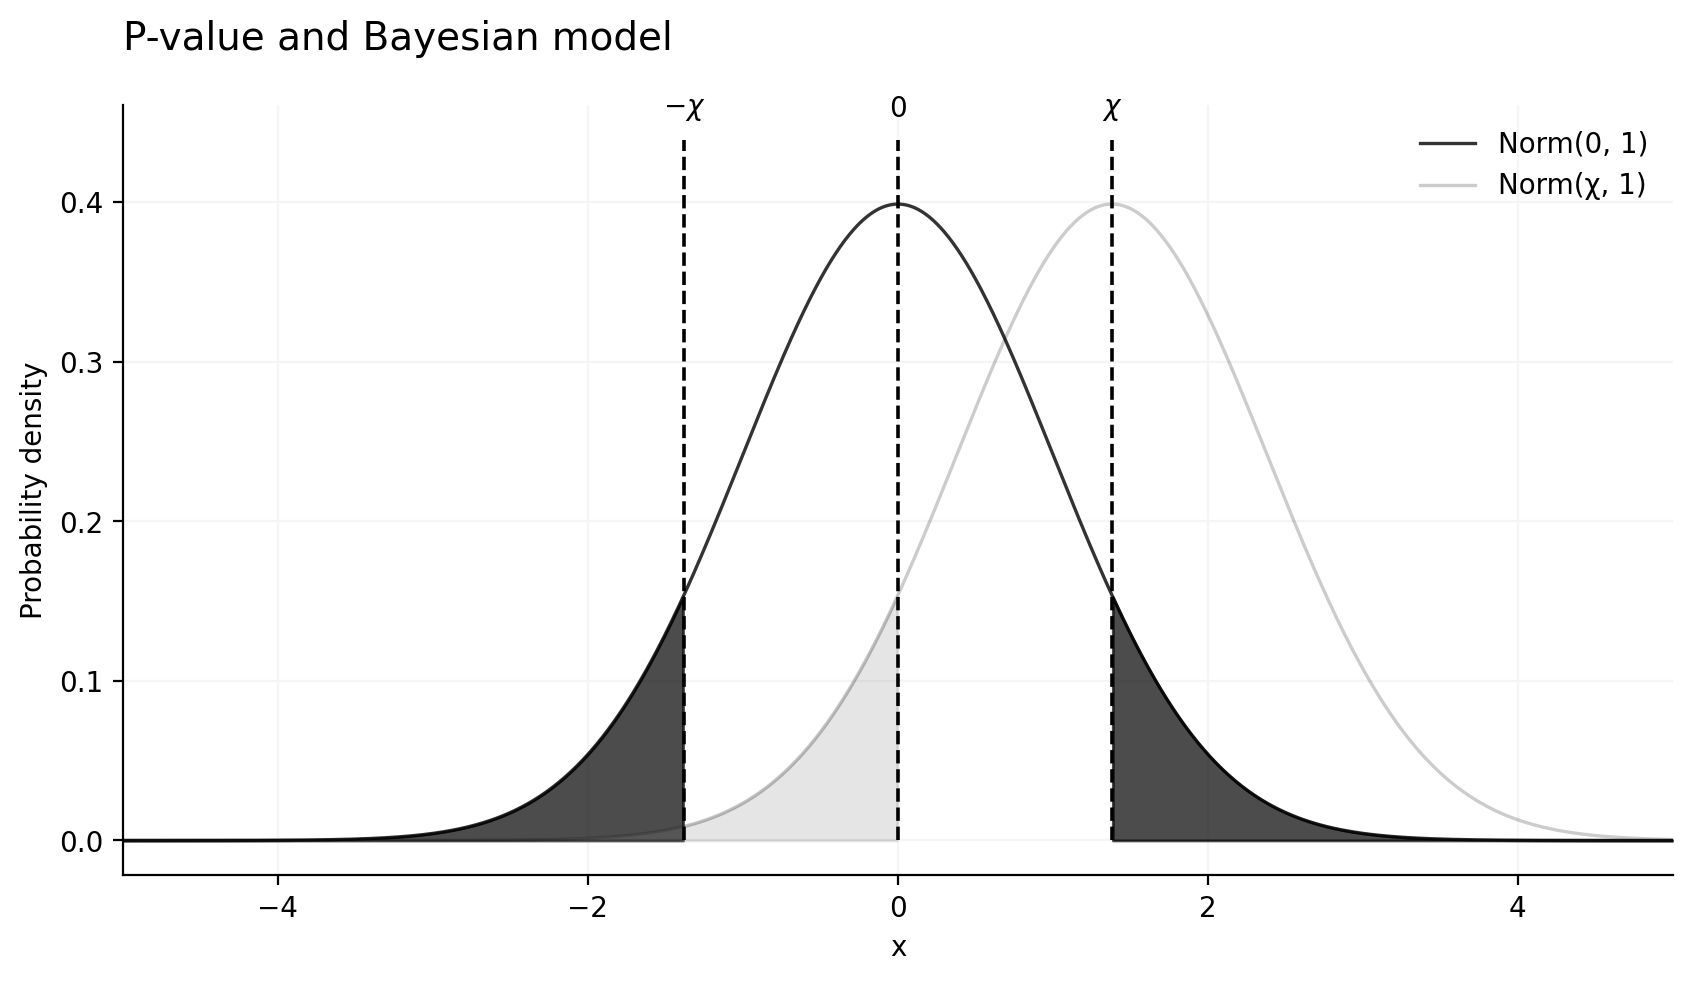

Bayes P(theta_b > theta_a): 0.9163
Chi2: 1-pval/2:   0.9164


In [12]:
np.random.seed(27)

def posterior_dist_binom(ns, ntotal, a_prior=1, b_prior=1):
    a = a_prior + ns
    b = b_prior + ntotal - ns 
    return stats.beta(a=a, b=b)

def diff_ba_scaled(post_dist_A, post_dist_B):
    m = post_dist_B.mean() - post_dist_A.mean()
    v = post_dist_A.var() + post_dist_B.var()
    return stats.norm(loc=m/np.sqrt(v), scale=1)


pA = 0.1
pB = pA * 1.03

exactA = stats.bernoulli(pA)
exactB = stats.bernoulli(pB)

N = 10000
sampA = exactA.rvs(size=N)
sampB = exactB.rvs(size=N)
SA = np.sum(sampA)
SB = np.sum(sampB)

t = np.array([
    [SA,     N - SA],
    [SB,     N - SB]
])
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(t, correction=False)
chi = np.sqrt(chi2_stat)
p_A_samp = SA / N
p_B_samp = SB / N
pb_gt_pa_chi = 1 - p_value_chi2 / 2
pb_gt_pa_chi = pb_gt_pa_chi if p_B_samp > p_A_samp  else 1 - pb_gt_pa_chi

post_dist_A = posterior_dist_binom(ns=SA, ntotal=N)
post_dist_B = posterior_dist_binom(ns=SB, ntotal=N)
diff_dist_scaled = diff_ba_scaled(post_dist_A, post_dist_B)
pb_gt_pa_bayes = 1 - diff_dist_scaled.cdf(0)

xaxis_min = 0
xaxis_max = 5
x = np.linspace(xaxis_min, xaxis_max, 1000)
plt.figure()
y_chi = stats.chi.pdf(x, df=1)
plt.plot(x, y_chi, color="black", linewidth=1.2, alpha=0.8, label=r"$\chi^2_1$")
plt.fill_between(x[x > chi2_stat], y_chi[x > chi2_stat], color="black", alpha=0.7,
                 label=r"$P_{\chi^2_1}(x > \chi^2)$")
plt.plot([chi2_stat, chi2_stat], [0, y_chi.max()*1.1], color="black", linestyle="--")
plt.text(chi2_stat, y_chi.max()*1.15, r"$\chi^2$", ha="center", va="center")
plt.title("Chi-squared Distribution")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.xlim(xaxis_min, xaxis_max)
plt.legend()
plt.show()

xaxis_min = -5
xaxis_max = 5
x = np.linspace(xaxis_min, xaxis_max, 1000)
plt.figure()
y_norm = stats.norm.pdf(x, loc=0, scale=1)
plt.plot(x, y_norm, color="black", linewidth=1.2, alpha=0.8, label="Norm(0, 1)")
plt.plot([0, 0], [0, y_norm.max()*1.1], color="black", linestyle="--")
plt.text(0, y_norm.max()*1.15, "0", ha="center", va="center")
plt.plot([chi, chi], [0, y_norm.max()*1.1], color="black", linestyle="--")
plt.text(chi, y_norm.max()*1.15, r"$\chi$", ha="center", va="center")
plt.plot([-chi, -chi], [0, y_norm.max()*1.1], color="black", linestyle="--")
plt.text(-chi, y_norm.max()*1.15, r"$-\chi$", ha="center", va="center")
plt.fill_between(x[x>chi], y_norm[x>chi], color="black", alpha=0.7)
plt.fill_between(x[x<-chi], y_norm[x<-chi], color="black", alpha=0.7)
y_post = diff_dist_scaled.pdf(x)
plt.plot(x, y_post, color="black", linewidth=1.2, alpha=0.2, label="Norm(χ, 1)")
plt.fill_between(x[x<0], y_post[x<0], color="gray", alpha=0.2)
plt.title("P-value and Bayesian model")
plt.xlabel("x")
plt.ylabel("Probability density")
plt.xlim(xaxis_min, xaxis_max)
plt.legend()
plt.show()

print(f'Bayes P(theta_b > theta_a): {pb_gt_pa_bayes:.4f}')
print(f"Chi2: 1-pval/2:   {pb_gt_pa_chi:.4f}")

The $\chi^2$ $p$-value is used to select the group with higher conversion in a series of experiments. In each experiment, there are two groups: the conversion in group $A$ is fixed at $p_A = 0.1$, while $p_B$ is randomly chosen within $\pm 5\%$ of $p_A$. Data are added to each group in increments of `n_samp_step` per step. At each step, both the $\chi^2$ $p$-value and the Bayesian probability $P(\theta_B > \theta_A \mid A_i, B_j)$ are computed. The experiment stops when the estimated probability that one group has a higher conversion exceeds `prob_stop` or when the maximum number of points, `n_samp_max`, is reached. Out of `nexps = 1000` experiments, 986 were completed, with 940 correctly identified groups, yielding a proportion of `0.953`, close to `prob_stop = 0.95`.

In [ ]:
cmp = pd.DataFrame(columns=['A', 'B', 'best_exact', 'exp_samp_size', 'A_exp', 'B_exp', 'best_exp', 'p_best_bayes', 'p_best_chi'])

p = 0.1
nexps = 1000
cmp['A'] = [p] * nexps
cmp['B'] = p * (1 + stats.uniform.rvs(loc=-0.05, scale=0.1, size=nexps))
cmp['best_exact'] = cmp.apply(lambda r: 'B' if r['B'] > r['A'] else 'A', axis=1)

n_samp_max = 5_000_000
n_samp_step = 10_000
prob_stop = 0.95

for i in range(nexps):
    pA = cmp.at[i, 'A']
    pB = cmp.at[i, 'B']
    exact_dist_A = stats.bernoulli(p=pA)
    exact_dist_B = stats.bernoulli(p=pB)
    n_samp_total = 0
    ns_A = 0
    ns_B = 0
    while n_samp_total < n_samp_max:
        dA = exact_dist_A.rvs(n_samp_step)
        dB = exact_dist_B.rvs(n_samp_step)
        n_samp_total += n_samp_step
        ns_A = ns_A + np.sum(dA)
        ns_B = ns_B + np.sum(dB)
        p_A_samp = ns_A / n_samp_total
        p_B_samp = ns_B / n_samp_total
        t = np.array([
            [ns_A,     n_samp_total - ns_A],
            [ns_B,     n_samp_total - ns_B]
        ])
        chi2_stat, p_value_chi, dof, expected = stats.chi2_contingency(t, correction=False)
        pb_gt_pa_chi = 1 - p_value_chi / 2
        pb_gt_pa_chi = pb_gt_pa_chi if p_B_samp > p_A_samp  else 1 - pb_gt_pa_chi
        best_gr = 'B' if pb_gt_pa_chi >= prob_stop else 'A' if 1 - pb_gt_pa_chi >= prob_stop else None
        if best_gr:
            post_dist_A = posterior_dist_binom(ns=ns_A, ntotal=n_samp_total)
            post_dist_B = posterior_dist_binom(ns=ns_B, ntotal=n_samp_total)
            pb_gt_pa_bayes = 1 - diff_ba_scaled(post_dist_A, post_dist_B).cdf(0)
            cmp.at[i, 'A_exp'] = p_A_samp
            cmp.at[i, 'B_exp'] = p_B_samp
            cmp.at[i, 'exp_samp_size'] = n_samp_total
            cmp.at[i, 'best_exp'] = best_gr
            cmp.at[i, 'p_best_bayes'] = max(pb_gt_pa_bayes, 1 - pb_gt_pa_bayes)
            cmp.at[i, 'p_best_chi'] = max(pb_gt_pa_chi, 1 - pb_gt_pa_chi)
            break
    print(f'done {i}: nsamp {n_samp_total}, best_gr {best_gr}, P_best Bayes {max(pb_gt_pa_bayes, 1 - pb_gt_pa_bayes):.4f}, Chi (1-pval/2): {1 - p_value_chi/2:.4f}')

cmp['correct'] = cmp['best_exact'] == cmp['best_exp']
display(cmp.head(30))
finished = np.sum(cmp['best_exp'].notna())
cor_guess = np.sum(cmp['correct'])
print(f"Nexp: {nexps}, Finished: {finished}, Correct Guesses: {cor_guess}, Accuracy: {cor_guess / finished}")

## Mann-Whitney $U$ Test

The Mann-Whitney $U$ statistic for samples from two random variables $A$, $B$ of size $N_A$, $N_B$ is defined by pairwise comparisons of elements [[MannWhitneyU](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test)]. For continuous distributions, the probability of ties is zero. In this case, the $U$ statistic is the number of pairs $(A_i, B_j)$ where $A_i > B_j$, $U_A = \sum_{i=1}^{N_A} \sum_{j=1}^{N_B} I(A_i > B_j)$, where $I$ is the indicator function. Equivalently, the statistic can be expressed as $U_A = R_A - N_A(N_A + 1)/2$, where $R_A$ is the sum of ranks of elements $A$ in the combined sample. The term $N_A(N_A + 1)/2$ corresponds to the minimal sum of ranks if all $A_i < B_j$, computed as an arithmetic series. If the largest $A_i$ exceeds $n$ elements of $B$, then $U_A = n$ and $R_A = N_A(N_A + 1)/2 + n$. For large sample sizes, the ratio $U_A / N_A N_B$ converges to the probability that a randomly selected value from $A$ exceeds one from $B$.

$$
\begin{split}
A, B & - \text{continuous distributions}
\\
U_A & = \sum_{i=1}^{N_A} \sum_{j=1}^{N_B} I(A_i > B_j),
\quad
I(\cdot) = 1 \text{ if the condition is true, else } 0 
\\
U_A & = R_A - N_A (N_A + 1)/2, \quad R_A \text{- sum of ranks of elements A in the combined sample } A_i, B_j
\\
\frac{U_A}{N_A N_B} & \to P(A > B),
\quad
N_A, N_B \to \infty
\end{split}
$$

The mean $E[U_A]$ and variance $\text{Var}(U_A)$ of the $U$ statistic are known under the null hypothesis of identical distributions $A = B$. The standardized statistic $(U_A - E[U_A]) / \sqrt{\text{Var}(U_A)}$ converges to a normal distribution. It is convenient to use a probability $u_A = U_A / N_A N_B$. The $p$-value is then computed as $p = P(\text{Norm}(x < u_A; 1/2, \text{Var}(U_A) / (N_A N_B)^2))$ for $u_A < 0.5$, or as the upper-tail probability $x > u_A$ for $u_A > 0.5$.

$$
\begin{gather*}
H_0: A = B, 
\quad
E[U_A] = \frac{N_A N_B}{2}, \quad
\text{Var}(U_A) = \frac{N_A N_B (N_A + N_B + 1)}{12}
\\
\frac{U_A - E[U_A]}{\sqrt{\text{Var}(U_A)}} \to \text{Norm}(0,1), \quad N_A, N_B \to \infty
\\
u_A = \frac{U_A}{N_A N_B},
\quad
\frac{u_A - 1/2}{\sqrt{\text{Var}(U_A)/(N_A N_B)^2}} \to \text{Norm}(0,1), \quad N_A, N_B \to \infty
\\
p = P( x < u_A | H_0 ) = P \left( \mbox{Norm}\left(x < u_A; 1/2, \text{Var}(U_A)/(N_A N_B)^2 \right) \right),
\quad u_A < 0.5
\end{gather*}
$$

In the Bayesian approach, the probability $P(B > A)$ can be estimated by comparing the posterior predictive distributions of the two groups. This requires specifying models for the original distributions, constructing posterior distributions of the parameters, and deriving posterior predictive distributions to compute $P(B > A)$. An alternative approach, which does not require distributional assumptions, is to model the probability $\theta = P(B > A)$ that a point from $B$ exceeds a point from $A$. Data consist of pairs $(A_i, B_j)$, where $B_j > A_i$ with probability $\theta$. Given the total number of pairs $N$ and the number $S$ of pairs with $B_j > A_i$, $\theta$ can be estimated. This problem is analogous to modeling conversion rates. To ensure independence, each $A_i$ is compared with only one $B_j$, avoiding repeated comparisons that would create dependencies. The likelihood is then binomial, $P(S \mid \theta) = \text{Binom}(S \mid \theta, N)$, and the prior is a beta distribution. The posterior is also beta-distributed. The probability that a point from one group exceeds a point from the other is the posterior mass above $0.5$: $P(B > A) \approx P(\theta  > 0.5 | S, N)$.

$$
\begin{gather}
\theta = P(B > A),
\quad
S = \sum_{i=1}^N I(B_i > A_i),
\quad N_A = N_B = N
\\
\begin{split}
P(S | \theta) & = \text{Binom}(S; \theta, N)
\\
P(\theta) & = \text{Beta}(\theta; \alpha, \beta)
\\
P(\theta | S) & = \text{Beta}(\theta; S + \alpha, N - S + \beta)
\\
& \approx \text{Norm}(\theta; \mu, \sigma^2),
\quad
\mu = (S + \alpha ) / (N + \alpha + \beta), 
\quad
\sigma^2 = \mu (1 - \mu) / N,
\quad
N, S \gg \alpha, \beta \gg 1
\end{split}
\\
\,
\\
\begin{split}
P(B > A) \approx P(\theta  > 0.5 | S, N) & = P(\text{Norm}(x > 0.5; \mu, \sigma^2))
\end{split}
\end{gather}
$$

In the Mann-Whitney $U$ statistic, each observation $A_i$ is compared with every $B_j$, whereas in the Bayesian model each $A_i$ and $B_j$ participates in only one comparison. Because the Bayesian approach uses fewer effective comparisons, its posterior variance is larger than that of the $U$ statistic. As a result, the $p$-value is not numerically close to the Bayesian probability $P(\theta > 0.5 \mid S, N)$. As the sample size grows, $\mathrm{Var}(U_A)/(N_A N_B)^2 \to 1/6N$ for $N_A = N_B = N \to \infty$. In the Bayesian model, under small differences between groups, the posterior satisfies $\mu \approx 0.5$ and $\sigma^2 \approx 1/4N$. Consequently, the relationship $p \lesssim 1 - P(B > A)$ holds asymptotically.

$$
\begin{split}
p & \approx P \left( \mbox{Norm}\left(x < u_A; 0.5, 1/6N \right) \right)
\\
& \lesssim P(\text{Norm}(x < 0.5; \mu, 1/4N))
\\
& \approx P(A > B)
\\
& = 1 - P(B > A)
\end{split}
$$

The relationship between the $p$-value and the Bayesian probability is illustrated using normal distributions. The probability that a draw from distribution $B$ exceeds a draw from $A$ equals the probability that their difference is positive $P(B > A) = P(B - A > 0)$. The difference of two normally distributed random variables is itself normally distributed, with mean equal to the difference of the original means and variance equal to the sum of the variances [[NormalSum](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables)].

$$
\begin{gather}
A \sim \text{Norm}(\mu_A, \sigma_A^2),
\quad
B \sim \text{Norm}(\mu_B, \sigma_B^2)
\\
B - A \sim \text{Norm}(\mu_B - \mu_A, \sigma_A^2 + \sigma_B^2)
\\
P(B > A) = P(B - A > 0) = 1 - F_{B-A}(0)
\end{gather}
$$

The first panel shows the original normal distributions with means `mu1 = 0, mu2 = 0.1` and unit variance. In the second panel, the dark curve represents the distribution of $U/N_A N_B$ under the assumption of identical distributions. The dark shaded area corresponds to the $p$-value of the Mann-Whitney $U$ test [[ScipyMannWhitneyU](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html)]. The light curve shows the Bayesian model, and the light shaded area represents the Bayesian probability $P(A > B)$. The Bayesian distribution is wider than $U/N_A N_B$ due to its larger variance. As a result, the light shaded area is typically larger than the dark one, consistent with the relation $p \lesssim P(A > B)$.

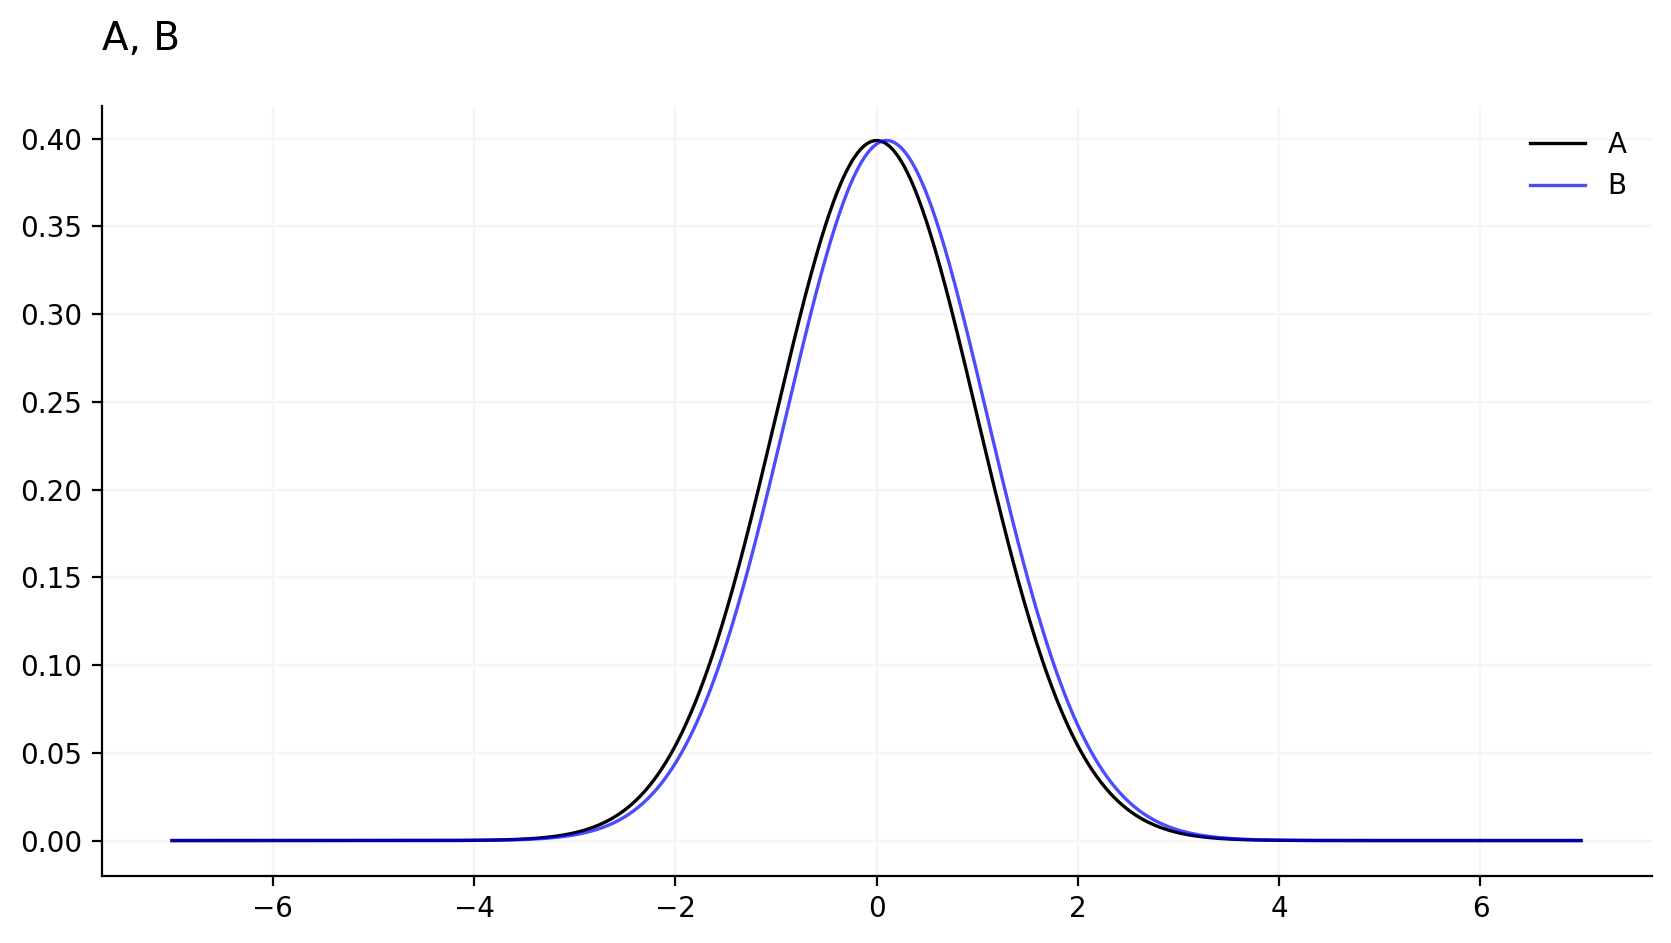

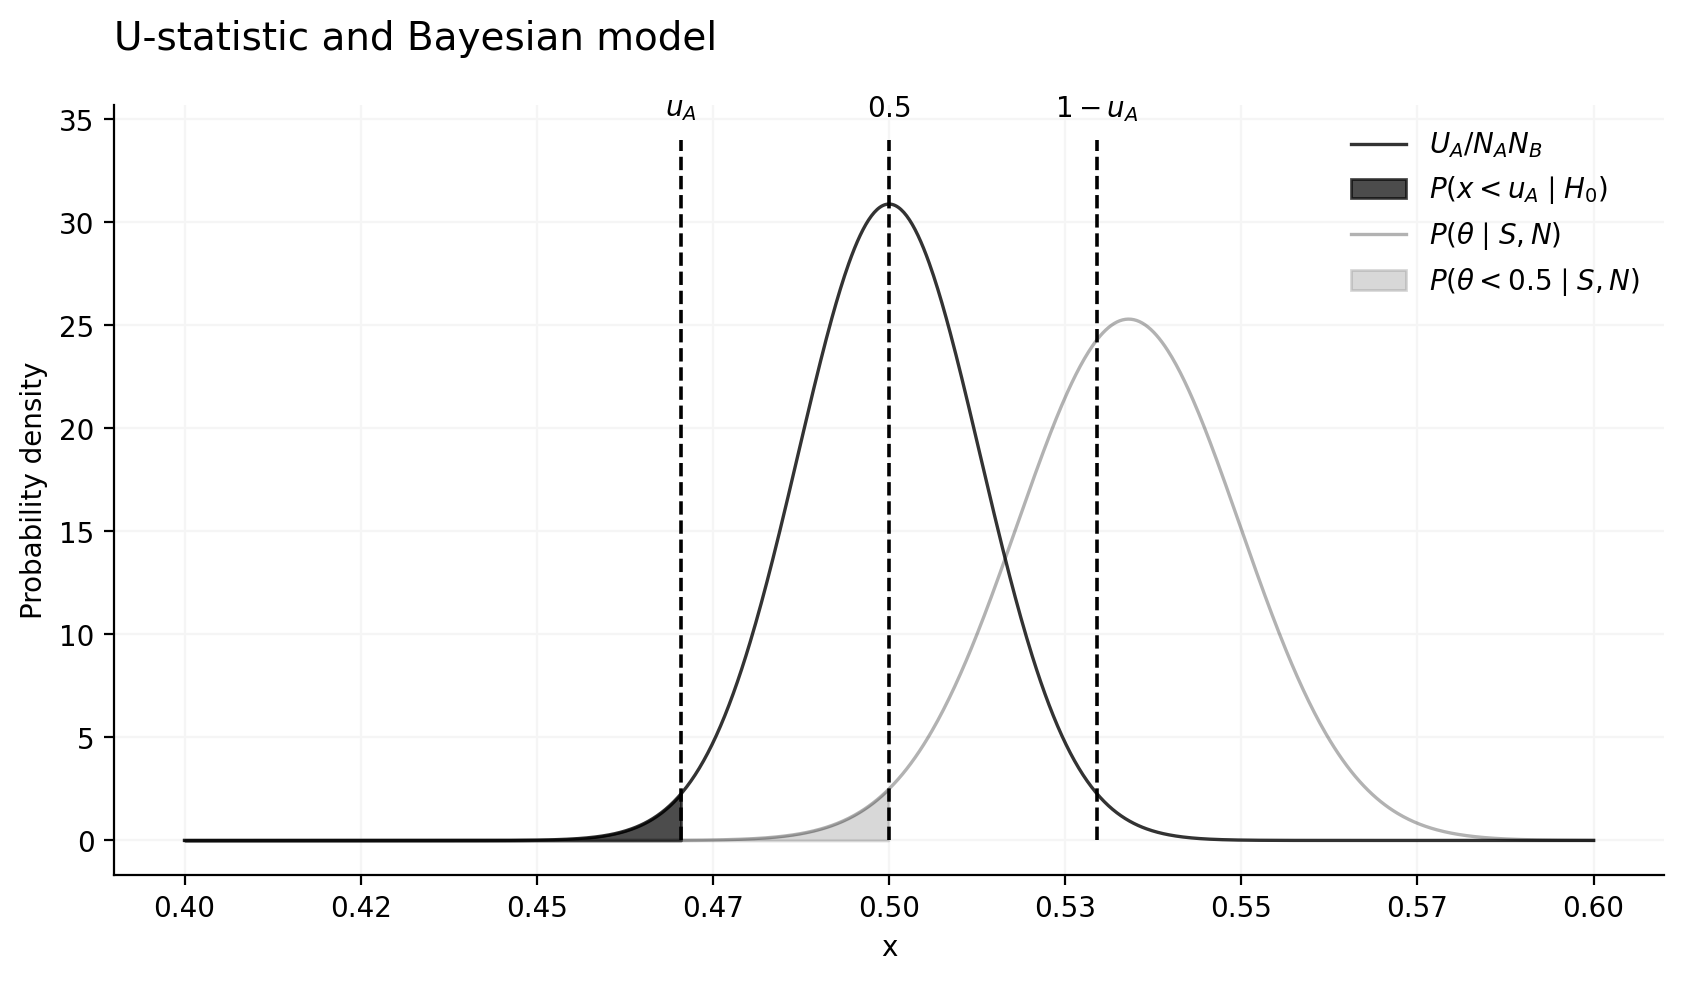

CDF(u_a): 0.01117
scipy min(pval, 1-pval): 0.01117
Bayes P(theta < 0.5) 0.01578

P(B>A) exact: 0.52819
1 - U/(NA NB): 0.52950
Bayes E[theta] 0.53393


In [15]:
np.random.seed(34)

mu1, sigma1 = 0.0, 1
mu2, sigma2 = 0.1, 1
exactA = stats.norm(loc=mu1, scale=sigma1)
exactB = stats.norm(loc=mu2, scale=sigma2)
p_b_gt_a_exact = 1 - stats.norm.cdf(0, loc=mu2-mu1, scale=np.sqrt(sigma1**2 + sigma2**2))

nA = nB = 1000
sampA = exactA.rvs(nA)
sampB = exactB.rvs(nB)

U, pval = stats.mannwhitneyu(sampA, sampB, alternative='greater')
pval = pval if U / (nA * nB) > 0.5 else 1 - pval
varu = nA * nB * (nA + nB + 1) / 12
p_u = stats.norm(loc=0.5, scale=np.sqrt(varu/(nA*nA*nB*nB)))
ua = U / (nA*nB)

a0 = 1
b0 = 1
S = np.sum(sampB > sampA)
post_theta = stats.beta(a0 + S, b0 + nB - S)

x = np.linspace(-7, 7, 1000)
plt.figure()
plt.plot(x, exactA.pdf(x), color="black", linewidth=1.2, label="A")
plt.plot(x, exactB.pdf(x), color="blue", linewidth=1.2, alpha=0.7, label="B")
plt.title("A, B")
plt.legend()
plt.show()

xaxis_min = 0.4
xaxis_max = 0.6
x = np.linspace(xaxis_min, xaxis_max, 1000)
plt.figure()
y_u = p_u.pdf(x)
plt.plot(x, y_u, color="black", linewidth=1.2, alpha=0.8, label=r"$U_A / N_A N_B$")
plt.fill_between(x[x < ua], y_u[x < ua], color="black", alpha=0.7, label=r"$P(x < u_A \mid H_0)$")
y_post = post_theta.pdf(x)
plt.plot(x, y_post, color="black", linewidth=1.2, alpha=0.3, label=r"$P(\theta \mid S, N)$")
plt.fill_between(x[x < 0.5], y_post[x < 0.5], color="gray", alpha=0.3, label=r"$P(\theta < 0.5 \mid S, N)$")
plt.plot([ua, ua], [0, y_u.max()*1.1], color="black", linestyle="--")
plt.text(ua, y_u.max()*1.15, r"$u_A$", ha="center", va="center")
plt.plot([1-ua, 1-ua], [0, y_u.max()*1.1], color="black", linestyle="--")
plt.text(1-ua, y_u.max()*1.15, r"$1-u_A$", ha="center", va="center")
plt.plot([0.5, 0.5], [0, y_u.max()*1.1], color="black", linestyle="--")
plt.text(0.5, y_u.max()*1.15, r"$0.5$", ha="center", va="center")
plt.title("U-statistic and Bayesian model")
plt.xlabel("x")
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f'))
plt.ylabel("Probability density")
plt.legend()
plt.show()

print(f'CDF(u_a): {p_u.cdf(ua):.5f}')
print(f'scipy min(pval, 1-pval): {min(pval, 1-pval):.5f}')
print(f'Bayes P(theta < 0.5) {post_theta.cdf(0.5):.5f}')
print()
print(f'P(B>A) exact: {p_b_gt_a_exact:.5f}')
print(f'1 - U/(NA NB): {1-ua:.5f}')
print(f'Bayes E[theta] {post_theta.mean():.5f}')

The accuracy of selecting the variant with higher probability $P(B > A)$ is evaluated for both the Bayesian model and the Mann-Whitney $U$ statistic in a series of experiments. In each experiment, two normal distributions are generated. The mean of group $A$ is fixed at `mua = 0.1`, while the mean of group $B$ is drawn uniformly within $\pm 5\%$ of $A$. The Bayesian model is evaluated first. A total of nexp experiments are conducted, with `n_samp_step` observations added to each group per step. At each step, the Bayesian probability $P(B > A) = P(\theta > 0.5 \mid S)$ is computed. An experiment stops when either $P(B > A)$ or $P(A > B)$ exceeds `prob_stop`. In both the Bayesian and $U$-test approaches, a minimum effective sample size is required to achieve the target accuracy. In the Bayesian model, this is enforced via the prior parameters `a0 = 100000` and `b0 = 100000` rather than an explicit minimum sample size. Out of 1000 experiments, 860 terminate, and 827 yield the correct decision. The resulting accuracy of 0.96 is close to the target `prob_stop = 0.95`. At stopping, the $U$ statistic is computed and is typically larger than the corresponding Bayesian probability.

In [ ]:
cmp = pd.DataFrame(columns=['A', 'B', 'best_exact', 'exp_samp_size', 'A_exp', 'B_exp', 'best_exp', 'p_best_bayes', 'p_best_u'])

mua = 0.1
nexps = 1000
cmp['A'] = [mua] * nexps
cmp['B'] = mua * (1 + stats.uniform.rvs(loc=-0.05, scale=0.1, size=nexps))
cmp['best_exact'] = cmp.apply(lambda r: 'B' if r['B'] > r['A'] else 'A', axis=1)

n_samp_max = 5_000_000
n_samp_step = 10000
prob_stop = 0.95

for i in range(nexps):
    mua = cmp.at[i, 'A']
    mub = cmp.at[i, 'B']
    exact_dist_A = stats.norm(loc=mua)
    exact_dist_B = stats.norm(loc=mub)
    n_samp_total = 0
    sampA = exact_dist_A.rvs(n_samp_max)
    sampB = exact_dist_B.rvs(n_samp_max)
    while n_samp_total < n_samp_max:
        n_samp_total += n_samp_step
        a0 = 100000
        b0 = 100000
        Ub = np.sum(sampB[:n_samp_total] > sampA[:n_samp_total])
        post_u_ewise = stats.beta(a0 + Ub, b0 + n_samp_total - Ub)
        pb_gt_pa_bayes = 1 - post_u_ewise.cdf(0.5)
        best_gr = 'B' if pb_gt_pa_bayes >= prob_stop else 'A' if 1 - pb_gt_pa_bayes >= prob_stop else None
        if best_gr:
            U, pval = stats.mannwhitneyu(sampA[:n_samp_total], sampB[:n_samp_total], alternative='greater')
            cmp.at[i, 'A_exp'] = sampA[:n_samp_total].mean()
            cmp.at[i, 'B_exp'] = sampB[:n_samp_total].mean()
            cmp.at[i, 'exp_samp_size'] = n_samp_total
            cmp.at[i, 'best_exp'] = best_gr
            cmp.at[i, 'p_best_bayes'] = max(pb_gt_pa_bayes, 1 - pb_gt_pa_bayes)
            cmp.at[i, 'p_best_u'] = max(pval, 1 - pval)
            break
    print(f'done {i}: nsamp {n_samp_total}, best_gr {best_gr}, P_best Bayes {pb_gt_pa_bayes:.4f}, U p-val: {pval:.4f}')

cmp['correct'] = cmp['best_exact'] == cmp['best_exp']
display(cmp.head(30))
finished = np.sum(cmp['best_exp'].notna())
cor_guess = np.sum(cmp['correct'])
print(f"Nexp: {nexps}, Finished: {finished}, Correct Guesses: {cor_guess}, Accuracy: {cor_guess / finished}")

To evaluate the accuracy of decisions based on the Mann-Whitney $U$ statistic, a larger sampling step is used, with `n_samp_step = 200_000` observations added to each group per iteration. This step size implicitly enforces a minimum effective sample size. Out of 300 experiments, 262 terminate, and 249 correctly identify the superior group. The resulting accuracy of `0.95` matches the target stopping threshold `prob_stop = 0.95`.

In [ ]:
cmp = pd.DataFrame(columns=['A', 'B', 'best_exact', 'exp_samp_size', 'A_exp', 'B_exp', 'best_exp', 'p_best_bayes', 'p_best_u'])

mua = 0.1
nexps = 300
cmp['A'] = [mua] * nexps
cmp['B'] = mua * (1 + stats.uniform.rvs(loc=-0.05, scale=0.1, size=nexps))
cmp['best_exact'] = cmp.apply(lambda r: 'B' if r['B'] > r['A'] else 'A', axis=1)

n_samp_max = 5_000_000
n_samp_step = 200_000
prob_stop = 0.95

for i in range(nexps):
    mua = cmp.at[i, 'A']
    mub = cmp.at[i, 'B']
    exact_dist_A = stats.norm(loc=mua)
    exact_dist_B = stats.norm(loc=mub)
    n_samp_total = 0
    sampA = exact_dist_A.rvs(n_samp_max)
    sampB = exact_dist_B.rvs(n_samp_max)
    while n_samp_total < n_samp_max:
        n_samp_total += n_samp_step
        U, pval = stats.mannwhitneyu(sampA[:n_samp_total], sampB[:n_samp_total], alternative='greater')
        pb_gt_pa_u = 1 - U / n_samp_total / n_samp_total
        best_gr = 'B' if pval >= prob_stop else 'A' if 1 - pval >= prob_stop else None        
        if best_gr:
            a0 = 100000
            b0 = 100000
            Ub = np.sum(sampB[:n_samp_total] > sampA[:n_samp_total])
            post_u_ewise = stats.beta(a0 + Ub, b0 + n_samp_total - Ub)
            pb_gt_pa_bayes = 1 - post_u_ewise.cdf(0.5)
            cmp.at[i, 'A_exp'] = sampA[:n_samp_total].mean()
            cmp.at[i, 'B_exp'] = sampB[:n_samp_total].mean()
            cmp.at[i, 'exp_samp_size'] = n_samp_total
            cmp.at[i, 'best_exp'] = best_gr
            cmp.at[i, 'p_best_bayes'] = max(pb_gt_pa_bayes, 1 - pb_gt_pa_bayes)
            cmp.at[i, 'p_best_u'] = max(pval, 1 - pval)
            break
    print(f'done {i}: nsamp {n_samp_total}, best_gr {best_gr}, P_best Bayes {pb_gt_pa_bayes:.4f}, U p-val: {pval:.4f}')

cmp['correct'] = cmp['best_exact'] == cmp['best_exp']
display(cmp.head(30))
finished = np.sum(cmp['best_exp'].notna())
cor_guess = np.sum(cmp['correct'])
print(f"Nexp: {nexps}, Finished: {finished}, Correct Guesses: {cor_guess}, Accuracy: {cor_guess / finished}")

For the $t$-test, $\chi^2$-test, and Mann-Whitney $U$ test, Bayesian models are presented in which the probability of the superior group is numerically close to the corresponding $p$-values. This correspondence holds despite differences in the definitions of $p$-values and Bayesian probabilities.

## References

[Chi2Dist] - [Chi-squared Distribution](https://en.wikipedia.org/wiki/Chi-squared_distribution), *Wikipedia.*  
[Chi2Pearson] - [Pearson’s Chi-squared Test](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test), *Wikipedia.*  
[Chi2Test] - [Chi-squared Test](https://en.wikipedia.org/wiki/Chi-squared_test), *Wikipedia.*  
[ConjPrior] - [Conjugate Prior](https://en.wikipedia.org/wiki/Conjugate_prior#When_likelihood_function_is_a_continuous_distribution), *Wikipedia.*   
[HT] - [Statistical Hypothesis Test](https://en.wikipedia.org/wiki/Statistical_hypothesis_test), *Wikipedia.*   
[MannWhitneyU] - [Mann-Whitney U Test](https://en.wikipedia.org/wiki/Mann%E2%80%93Whitney_U_test), *Wikipedia.*  
[NormalSum] - [Sum of Normally Distributed Random Variables](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables), *Wikipedia.*  
[PVal] - [P-value](https://en.wikipedia.org/wiki/P-value), *Wikipedia.*  
[ScipyChi2Con] - [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html), *SciPy Reference.*  
[ScipyMannWhitneyU] - [scipy.stats.mannwhitneyu](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html), *SciPy Reference.*  
[ScipyTTestInd] - [scipy.stats.ttest_ind](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html), *SciPy Reference.*  
[TailedTests] - [One- and Two-tailed Tests](https://en.wikipedia.org/wiki/One-_and_two-tailed_tests), *Wikipedia.*  
[TDist] - [Student’s t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution), *Wikipedia.*  
[TestStat] - [Test Statistic](https://en.wikipedia.org/wiki/Test_statistic), *Wikipedia.*  
[TTest] - [Student’s t-test](https://en.wikipedia.org/wiki/Student%27s_t-test), *Wikipedia.*  
[WelchT] - [Welch’s t-test](https://en.wikipedia.org/wiki/Welch%27s_t-test), *Wikipedia.*